In [1]:
import os
import sys
import math
import random
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator, AutoMinorLocator

In [2]:
root_path = "E:\\Tasks\\09. Traffic Congestion Prediction\\STGIN-main"
results_path = os.path.join(root_path, "Results_KNN") # Results_K, Results_R

In [6]:
data_names = ['METRLA', 'PEMSBAY']
method_names = ['STGIN_1', 'STGIN_2', 'FI-RNNs', 'PSPNN', 'SVM']
method_names = ['STGIN_1']
matrices_name = ['MAE', 'RMSE', 'MAPE']
Horizons = [3, 6, 12]  
r_ratios = [1, 5, 10]
knn = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [32]:
def bar_chart(results, title, metric_name, method_names, labels):
    barWidth = 0.09  # Adjusted width for better spacing
    fig, ax = plt.subplots(figsize=(16, 8))  
    br = np.arange(len(Horizons))

    x_labels = labels
    num_bars = len(results[0])
    num_groups = len(x_labels)
    bar_width = 0.05  # Width of each bar
    x = np.arange(num_groups)  # The label locations
    
    for i, m in enumerate(method_names):
        values = [results[j][i] for j in range(len(results))]
        ax.bar(br + i * barWidth, values, barWidth, label=f"K threshold= {m}")
   
    ax.set_xlabel('Horizon', fontweight='bold', fontsize=10)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(metric_name, fontweight='bold', fontsize=8)
    # 
    ax.set_xticks(x + bar_width * (num_bars - 1) / 2)
    ax.set_xticklabels(labels)
    ax.legend(loc="best")
    plt.savefig(os.path.join(results_path, metric_name + f"_{title}.png"))
    plt.savefig(os.path.join(results_path, metric_name + f"_{title}.svg"), format='svg') 
    plt.show()

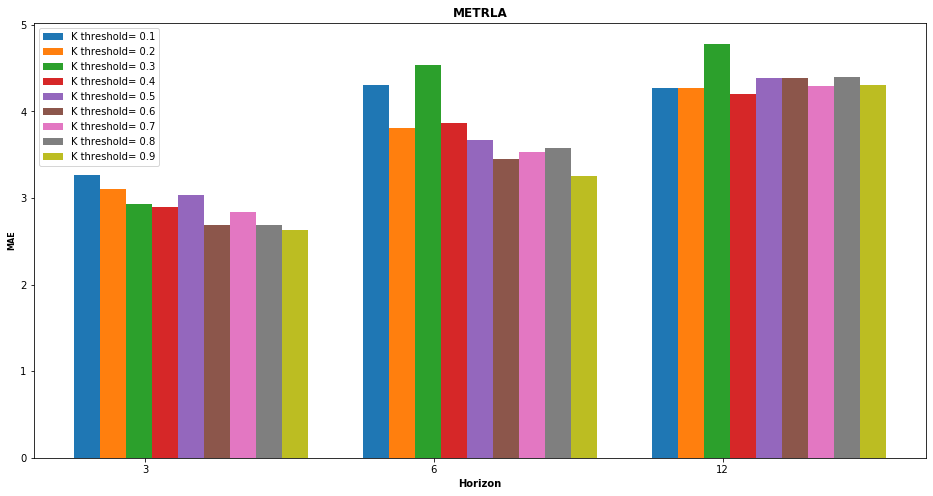

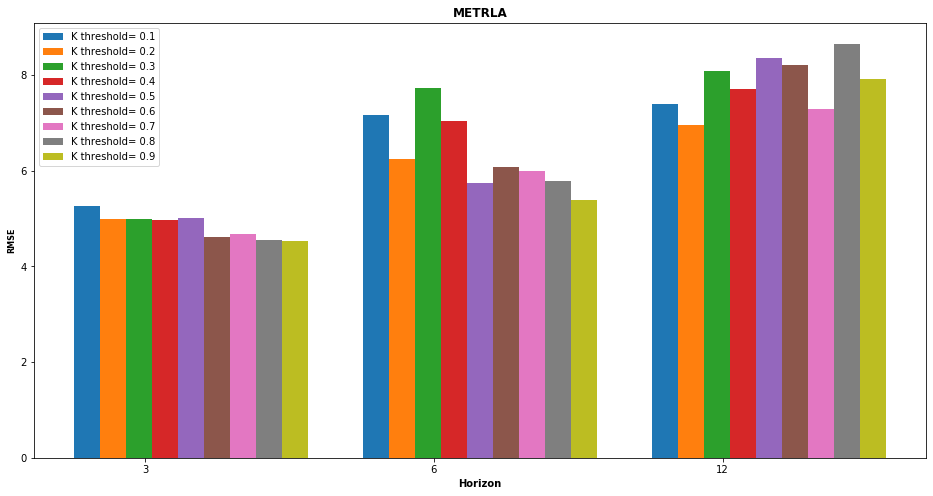

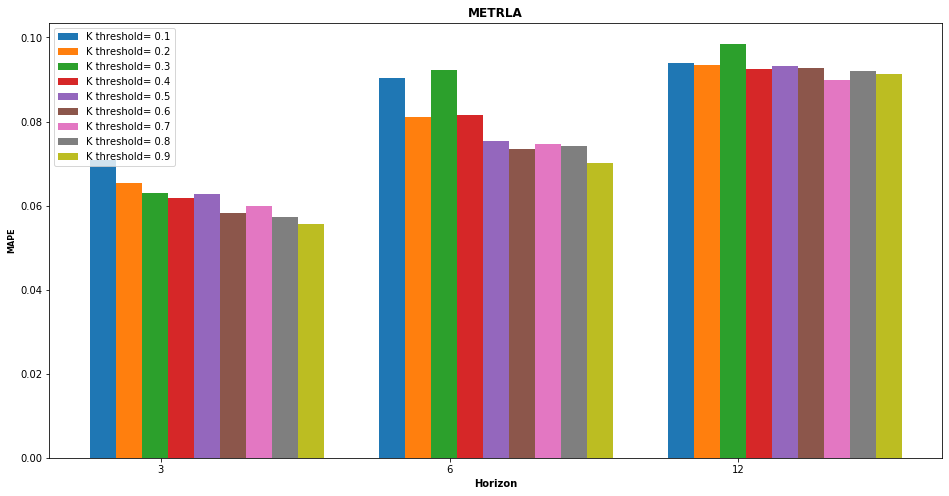

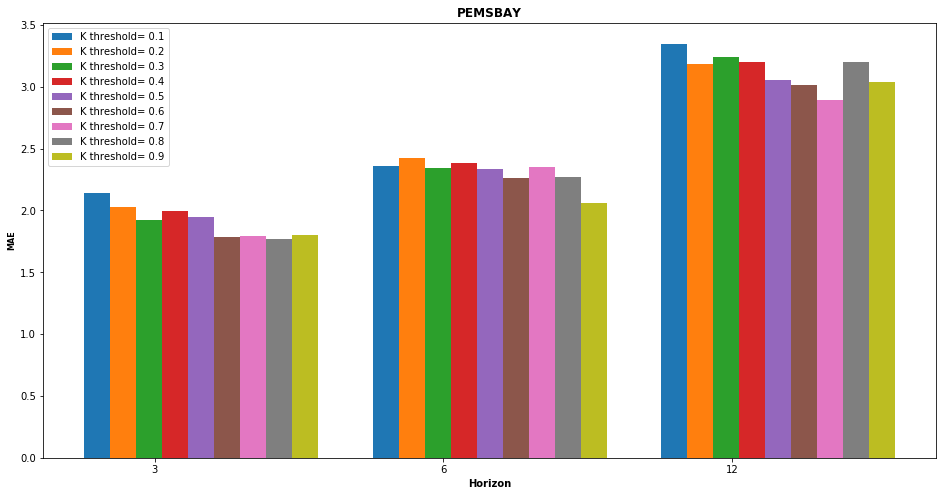

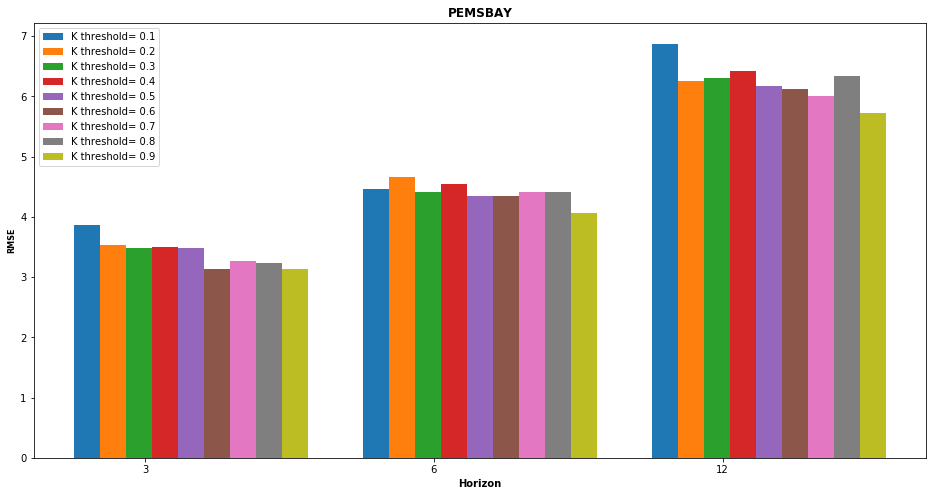

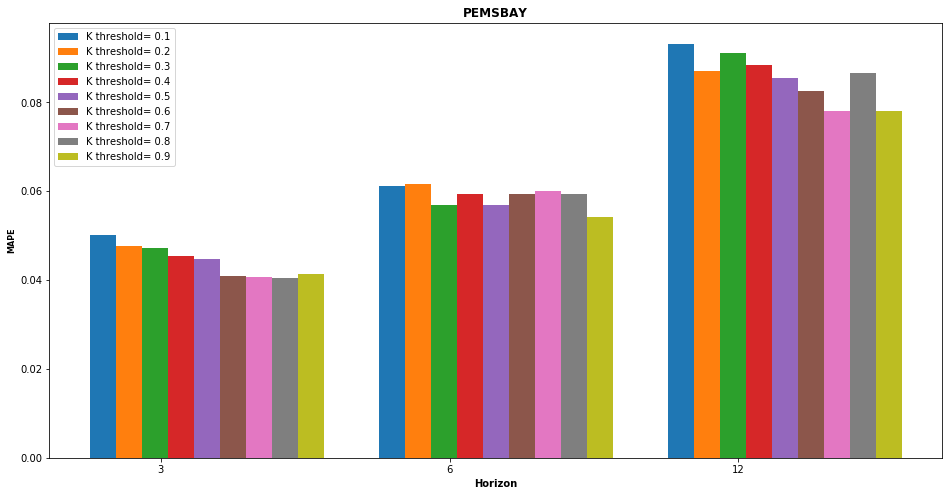

In [33]:
for data_name in data_names:
    for metric_name in matrices_name:
        Horizon_results = []
        for Horizon in Horizons:
            method_results = []
            # for method_name in method_names:
            method_name = 'STGIN_1'
            for k in knn:
                result_path = os.path.join(results_path, 'Results_' + data_name + '_' + method_name + '_Horizon' + str(Horizon)+"KNN_"+str(k))
                df = pd.read_csv(os.path.join(result_path, 'test results.csv'))
                method_results.append(min(df[metric_name].tolist()))
            Horizon_results.append(method_results)
        bar_chart(Horizon_results, data_name, metric_name, knn, Horizons)

In [ ]:
def Results_plot(result, method_name, x_label, y_label, save_path=results_path, step=1, vline_x=None):
    plt.figure(figsize=(12, 8))
    plt.title(y_label + " per epoch")
    for i, res in enumerate(result):
        x = np.arange(step, len(res) + step, step)
        y = res[::step]
        plt.plot(x, y , label=y_label) # , label=method_name[i])
        plt.scatter(x, y, s=10)
    plt.legend(loc="best")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    if vline_x is not None:
        plt.axvline(x=vline_x, color='r', linestyle='--', label='Test')
    plt.savefig(os.path.join(save_path, y_label+ f"_{method_name}.png"))
    plt.savefig(os.path.join(save_path, y_label+ f"_{method_name}.svg"), format='svg')
    plt.show()

In [ ]:
for data_name in data_names:
    for Horizon in Horizons:
        for method_name in method_names:
            for matric_name in matrices_name+['loss']:
                result_path = os.path.join(results_path, 'Results_'+data_name+'_'+method_name+'_Horizon'+str(Horizon))
                df = pd.read_csv(os.path.join(result_path, 'validation results.csv'))
                result = [df[matric_name].tolist()]
                Results_plot(result, "validation", 'epoches', matric_name, result_path)

In [ ]:
method_name = ['MAE', 'RMSE', 'MAPE', 'prediction time']
save_path = os.path.join(results_path, 'test results')
if not os.path.exists(save_path):
    os.makedirs(save_path)
for y_label in method_name:
    result = [test_df[y_label].tolist()]
    Results_plot(result, "test", 'steps', y_label, save_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data input
data = [
    [2.970905542373657, 2.4155168533325195, 2.94711971282959, 3.0230607986450195, 2.5316312313079834],
    [3.378209590911865, 2.917264699935913, 3.4978148937225337, 3.180705547332764, 2.88181471824646],
    [3.378209590911865, 2.917264699935913, 3.4978148937225337, 3.180705547332764, 2.88181471824646]
]

# X-axis labels
x_labels = [3, 6, 15]

# Number of bars per group
num_bars = len(data[0])

# Number of groups
num_groups = len(x_labels)

# Create an array with the positions of each group on the x-axis
bar_width = 0.05  # Width of each bar
x = np.arange(num_groups)  # The label locations

# Create the figure and the axis
fig, ax = plt.subplots()

# Plot each set of bars
for i in range(num_bars):
    values = [data[j][i] for j in range(len(data))]
    ax.bar(x + i * bar_width, values, bar_width, label=f'Bar {i + 1}')

# Add labels, title, and legend
ax.set_xlabel('X axis label')
ax.set_ylabel('Values')
ax.set_title('Bar chart with multiple bars per group')
ax.set_xticks(x + bar_width * (num_bars - 1) / 2)
ax.set_xticklabels(x_labels)
ax.legend()

# Display the chart
plt.show()
